# Gradient & Stochactic Gradient from scratch

## 1. Gradient Descent

We will pull pokemon data from `pokemonGO.csv` and draw the line that best correlates **Damage** vs **Hit Points** for all 151 pokemon.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Top 5 rows of imported data:

In [2]:
dataset = pd.read_csv('pokemonGO.csv', usecols=[0, 1, 2, 3, 4, 5])
data = dataset.as_matrix()
print(dataset.head())

   Pokemon No.        Name Type 1  Type 2  Max CP  Max HP
0            1   Bulbasaur  Grass  Poison    1079      83
1            2     Ivysaur  Grass  Poison    1643     107
2            3    Venusaur  Grass  Poison    2598     138
3            4  Charmander   Fire     NaN     962      73
4            5  Charmeleon   Fire     NaN    1568     103


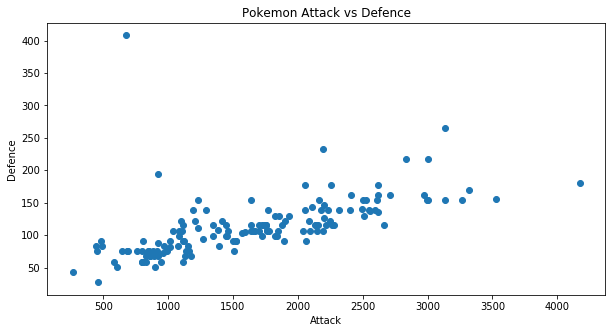

In [3]:
plt.figure(figsize=(10, 5))
plt.title('Pokemon Attack vs Defence')
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.scatter(x=data[:, 4], y=data[:, 5])
plt.show()

### Error

We calculate the sum of errors (squared) for a given random line $ y=ax+b $, with `a=0.1` and `b=100`, then plot it.

In [11]:
# Sum of Squared Errors
def SSE(a, b, data):

    tottal_error = 0.0
    N = data.shape[0]

    for i in range(N):
        dmg = data[i, 4]  # x-point
        hp = data[i, 5]  # y-point

        # predicted vs actual (error)
        y = a*dmg + b
        err = (y - hp) ** 2
        tottal_error += err
    
    return tottal_error/N

In [5]:
a = 0.1
b = 100

print("Example of SSE for a={:.4f}, b={:.4f}\nError={:.4f}".format(a, b, 
      SSE(a, b, data)))

Example of SSE for a=0.1000, b=100.0000
Error=26454.2459


In [6]:
def plot_it(a,b):
    plt.figure(figsize=(10, 5))
    plt.title('Pokemon Attack vs Defence')
    plt.xlabel('Attack')
    plt.ylabel('Defence')
    plt.scatter(x=data[:, 4], y=data[:, 5], label='Data')
    plt.plot(data[:, 4], a*data[:, 4] + b, label="Mean Line", color="red")
    plt.legend()
    plt.annotate("a={:.4f}\nb={:.4f}".format(a,b), (data[-1, 4], a*data[-1, 4] + b),
             xytext=(0.7, 0.85), textcoords='axes fraction')
    plt.show()

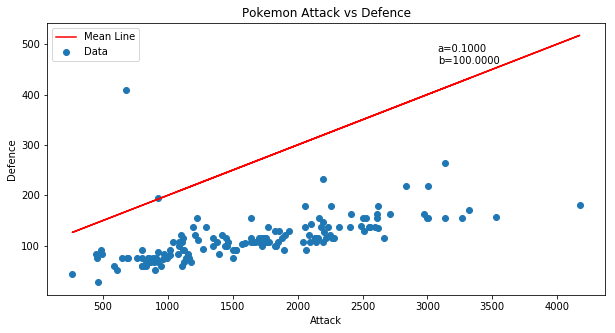

In [7]:
plot_it(a,b)

As we can see the line is quite off. Time to teach the program to move it in place.

### What's next?

The square error function is a 3D function `f(dmg,hp,err)`, which has maxima and minima.
Starting with a random `ax + b = 0` line, we will find the gradients of those `a` and `b` for each single data point. Then sum all the `a`'s in order to find the direction and intensity of the best descend of `a`. Similarly for `b`.

In [47]:
def gradient_descent(a,b,data):

    N = data.shape[0]
    a_grad = 0
    b_grad = 0
    
    for i in range(N):
        x = data[i, 4]
        y = data[i, 5]
        
        da = - ((2/N) * x * (y - (a*x + b)))
        db = - ((2/N) * (y - (a*x + b)))

        a_grad += da
        b_grad += db
    
    a_suggested = a - 0.0000001*a_grad # gama for a
    b_suggested = b - 0.1*b_grad # 'gama for a' is far too slow for b
    
    return a_suggested, b_suggested

### Utilize Gradient Descent to minimize Error

Start with any two values and use grad to move towards the local minima or both `a` and `b`.

In [48]:
def error_minimizer(a, b, data, epochs):
    for i in range(epochs):
        error = SSE(a, b, data)
        a, b = gradient_descent(a,b,data)
        print('Step {}: a={:.8f}, b={:.8f}, Error={:.4f}'.format(i+1, a, b, error))
    return a,b

### Train

We now run our *GD error minimizer* for 15 epochs, starting with `a=0` and `b=0`.

In [49]:
a_best,b_best = error_minimizer(0, 0, data, 15)

Step 1: a=0.04155228, b=22.72885906, Error=14973.4027
Step 2: a=0.04834897, b=27.21921582, Error=1835.0450
Step 3: a=0.04920611, b=28.57178598, Error=1443.7573
Step 4: a=0.04905509, b=29.37138994, Error=1426.1762
Step 5: a=0.04873968, b=30.06083599, Error=1419.8708
Step 6: a=0.04840404, b=30.71633145, Error=1414.2077
Step 7: a=0.04807263, b=31.35133114, Error=1408.8587
Step 8: a=0.04774944, b=31.96853896, Error=1403.7983
Step 9: a=0.04743493, b=32.56880794, Error=1399.0106
Step 10: a=0.04712899, b=33.15266366, Error=1394.4809
Step 11: a=0.04683140, b=33.72056531, Error=1390.1954
Step 12: a=0.04654194, b=34.27295063, Error=1386.1408
Step 13: a=0.04626039, b=34.81024385, Error=1382.3048
Step 14: a=0.04598654, b=35.33285736, Error=1378.6755
Step 15: a=0.04572016, b=35.84119226, Error=1375.2419


### Best Fitting Line

It seems the best values for `a` and `b` are `a=0.045` and `b=35.8` with an error of 1375. Of course the error drops as we run this for more iterrations, e.g. around 50 epochs (instad of 15) it stabilizes around 1315.

The new line looks extremely better:

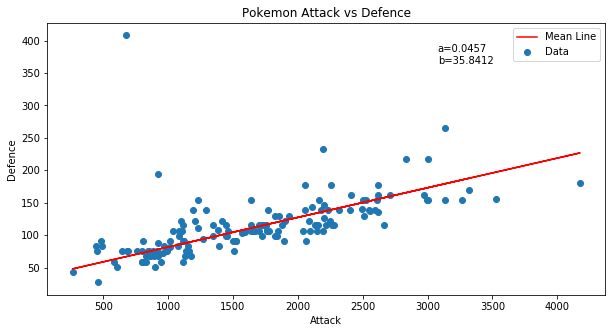

In [50]:
plot_it(a_best, b_best)

### Here is how the Gradient looks like:

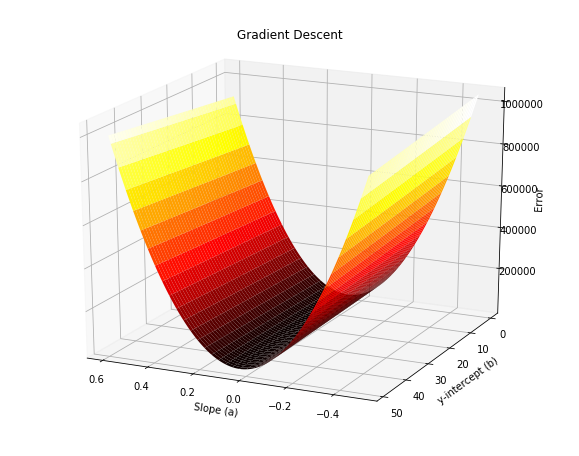

In [51]:
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y,data)

a = np.arange(-0.5,0.6,0.01)
b = np.arange(0,50, 1)


fig = plt.figure(figsize=(10,8))

# plot 1
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(a, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('Slope (a)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

plt.show()

## 2. Stochastic Gradient Descent (SG)

SG is used in cases with quite more massive data but since we're playing around, let's try to code it.

### Process

We will grab a batch of 10 random samples from our data and try to minimize the error for them. Then grab another batch of 10 data points, input the updated `a` and `b` values from the previous step, and take one more step towards the minima. 

Repeating this, should minimize our error. In fact it should bring our error close to the minimal, without having to go through the whole data even once.

In [52]:
def rand_sample(data, sample_size):
    idx = np.random.randint(data.shape[0], size=sample_size) # make an list of 10 random indexes from 'data'
    sample_data = data[idx,:] # create a sample from the indexes
   
    return sample_data

print(rand_sample(data, 10))

[[54 'Psyduck' 'Water' nan 1117 91]
 [151 'Mew' 'Psychic' nan 3322 170]
 [49 'Venomoth' 'Bug' 'Poison' 1903 122]
 [82 'Magneton' 'Electric' 'Steel' 1893 91]
 [126 'Magmar' 'Fire' nan 2281 115]
 [16 'Pidgey' 'Normal' 'Flying' 684 75]
 [149 'Dragonite' 'Dragon' 'Flying' 3525 156]
 [37 'Vulpix' 'Fire' nan 837 72]
 [105 'Marowak' 'Ground' nan 1668 107]
 [106 'Hitmonlee' 'Fighting' nan 1503 91]]


### Run SG

We run the gradient decsent for 3 batches of 10 data points each. That is, 30 data points in total.

In [53]:
a_sg, b_sg = 0, 0

for i in range(3):
    sample_data = rand_sample(data, 10)
    a_sg, b_sg = error_minimizer(a_sg, b_sg, sample_data, 1)

Step 1: a=0.04337914, b=24.18000000, Error=15081.7000
Step 1: a=0.05030838, b=28.51527478, Error=953.0121
Step 1: a=0.04585317, b=27.79456337, Error=474.0143


In [54]:
# Calculate Error of the line out of all the data
print('Error=',SSE(a_sg, b_sg, data))

Error= 1473.4035525466963


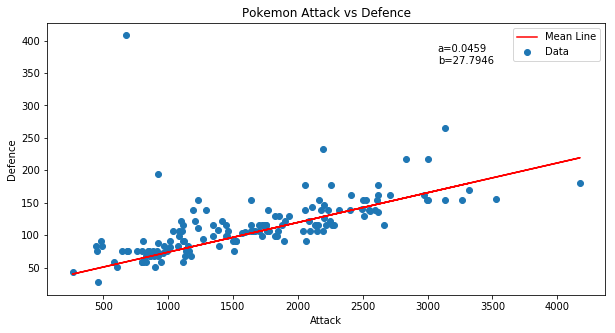

In [55]:
plot_it(a_sg, b_sg)

### Results

As we see, SG reached an error of 1431 (less that 10% higher than GD) in only 30 iterations. GD on the other hand went thrgough our whole 150 data fifteen times - namely, 2250 iterations - in order to reach its minimal value.

## Conclusion

SG is damn efficient.